<a href="https://colab.research.google.com/github/akshat2635/auto-eval/blob/main/final_rotate_optimised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr fuzzywuzzy pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# required modules
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import PIL.Image
from PIL import Image


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,497 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
from fuzzywuzzy import fuzz

str1 = 'True'
str2 = 'False'
fuzz.ratio(str1, "fa15e")

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


22

In [ ]:
def txt(text):
    str1 = 'true'
    str2 = 'false'
    str3=text.lower()
    # print(str3)
    r1=fuzz.ratio(str1, str3)
    r2=fuzz.ratio(str2, str3)
    if(r1>r2):
        return str1
    else:
        return str2
txt("7r5e")

'true'

In [ ]:
temp=arr*12

In [ ]:
len(temp)

576

In [ ]:
dir="/content/drive/MyDrive/Sample_Data"
arr=[]
for root,dirs,files in os.walk(dir):
    for file in files:
        path=dir+"/"+file
        arr.append(path)
file_names=arr.copy()

In [ ]:
def get_center_part(image_path):
    """
    Extracts the center part of the image when divided into 16 parts.
    """
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Calculate the dimensions of each part
    part_height = height // 8
    part_width = width // 8

    # Calculate the coordinates of the center part
    start_y = part_height
    end_y = 3 * part_height
    start_x = part_width
    end_x = 3 * part_width

    # Extract the center part
    center_part = image[start_y:end_y, start_x:end_x]

    return center_part

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

def get_image_orientation(image_path):
    """
    Detect the orientation of the text in the image and return the angle.
    """
    # image = cv2.imread(image_path)
    image=get_center_part(image_path)
    height, width = image.shape[:2]
    # image = image[:height//2, :width//2]
    # height, width = image.shape[:2]
    image=cv2.resize(image,(height//3,width//3))
    # image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Use Tesseract to detect text orientation
    osd = pytesseract.image_to_osd(image, output_type=Output.DICT)
    angle = osd['rotate']
    return -angle

def correct_image_orientation(image_path):
    """
    Correct the orientation of the image and save it.
    """
    angle = get_image_orientation(image_path)
    if angle == 0:
        return image_path

    image = cv2.imread(image_path)
    print(f"Rotating image {image_path} by {angle} degrees")

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Calculate the new bounding dimensions of the image
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to the center of rotation
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Perform the actual rotation and store the image
    rotated = cv2.warpAffine(image, M, (new_w, new_h))
    output_path = f"output_{image_path.split('/')[-1]}"
    cv2.imwrite(output_path, rotated)

    return output_path

# Function to process each image path
def process_image(image_path):
    return correct_image_orientation(image_path)

# Example usage
# arr = ["path/to/image1.jpg", "path/to/image2.jpg", "path/to/image3.jpg"] # Example image paths

# Using multiprocessing to parallelize the image processing
if __name__ == "__main__":
    with ProcessPoolExecutor() as executor:
        temp = list(tqdm(executor.map(process_image, temp), total=len(temp)))

# The `results` list now contains paths to the corrected images.
# print(results)

# The `arr` list now contains paths to the corrected images.


  2%|▏         | 11/576 [00:18<15:34,  1.65s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


  4%|▍         | 22/576 [00:32<10:53,  1.18s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


  7%|▋         | 38/576 [00:53<10:45,  1.20s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 10%|█         | 60/576 [01:22<10:16,  1.19s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 12%|█▏        | 70/576 [01:35<08:56,  1.06s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 15%|█▍        | 86/576 [01:58<11:03,  1.35s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 19%|█▉        | 108/576 [02:27<12:15,  1.57s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 20%|██        | 118/576 [02:43<13:56,  1.83s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 23%|██▎       | 134/576 [03:05<08:32,  1.16s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 27%|██▋       | 156/576 [03:33<08:11,  1.17s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 29%|██▉       | 166/576 [03:47<08:16,  1.21s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 32%|███▏      | 182/576 [04:10<10:13,  1.56s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 35%|███▌      | 204/576 [04:39<09:42,  1.57s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 37%|███▋      | 214/576 [04:53<09:28,  1.57s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 40%|███▉      | 230/576 [05:18<07:28,  1.30s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 44%|████▍     | 252/576 [05:47<06:59,  1.29s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 45%|████▌     | 262/576 [06:01<05:43,  1.09s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 48%|████▊     | 278/576 [06:23<06:41,  1.35s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 52%|█████▏    | 300/576 [06:53<06:31,  1.42s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 54%|█████▍    | 310/576 [07:05<05:06,  1.15s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 57%|█████▋    | 326/576 [07:28<04:52,  1.17s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 60%|██████    | 348/576 [08:01<04:31,  1.19s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 62%|██████▏   | 358/576 [08:14<03:54,  1.07s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 65%|██████▍   | 374/576 [08:36<04:27,  1.32s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 69%|██████▉   | 396/576 [09:05<04:16,  1.42s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 70%|███████   | 406/576 [09:18<02:57,  1.04s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 73%|███████▎  | 422/576 [09:41<03:28,  1.35s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 77%|███████▋  | 444/576 [10:14<03:02,  1.38s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 79%|███████▉  | 454/576 [10:28<02:49,  1.39s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 82%|████████▏ | 470/576 [10:48<01:57,  1.11s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 85%|████████▌ | 492/576 [11:16<01:37,  1.16s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 87%|████████▋ | 502/576 [11:30<01:23,  1.13s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 90%|████████▉ | 518/576 [11:52<01:24,  1.45s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


 94%|█████████▍| 540/576 [12:20<00:52,  1.45s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_153807.jpg by -180 degrees


 95%|█████████▌| 550/576 [12:37<00:44,  1.70s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_152325.jpg by -270 degrees


 98%|█████████▊| 566/576 [12:59<00:11,  1.12s/it]

Rotating image /content/drive/MyDrive/Sample_Data/20240328_150223.jpg by -90 degrees


100%|██████████| 576/576 [13:13<00:00,  1.38s/it]


In [ ]:
import cv2
import pytesseract
from pytesseract import Output

def get_image_orientation(image_path):
    """
    Detect the orientation of the text in the image and return the angle.
    """
    image = cv2.imread(image_path)
    # height,width=image.shape[:2]

    # # image=image[:height//10,:]
    # image=cv2.resize(image,(1024,1024))

    # Use Tesseract to detect text orientation
    osd = pytesseract.image_to_osd(image, output_type=Output.DICT)

    angle = osd['rotate']
    angle=-angle
    return angle

def correct_image_orientation(image_path,path,angle):
    """
    Correct the orientation of the image and save it.
    """
    image = cv2.imread(image_path)
    print(angle)
    # Get the rotation angle
    # angle = get_image_orientation(image_path)

    # Rotate the image to correct orientation
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Calculate the new bounding dimensions of the image
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # New bounding dimensions
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to the center of rotation
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Perform the actual rotation and store the image
    rotated = cv2.warpAffine(image, M, (new_w, new_h))
    cv2.imwrite(path,rotated)

    # Save the corrected image

    # plt.imshow(rotated)
    return path


# Example usage
for i in tqdm(range(len(arr))):
#   fname=arr[i].split('/')[-1]
#   if fname=="20240328_150223.jpg" or fname=="20240328_152325.jpg" or fname=="20240328_153807.jpg":
    angle=get_image_orientation(arr[i])
    if(angle!=0):
        path="output"+str(i)+".jpg"
        correct_image_orientation(arr[i],path,angle)
        arr[i]=path



  0%|          | 0/48 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
file_names[16]

'/content/drive/MyDrive/anand_mishra/data/Sample_Data/20240328_153807.jpg'

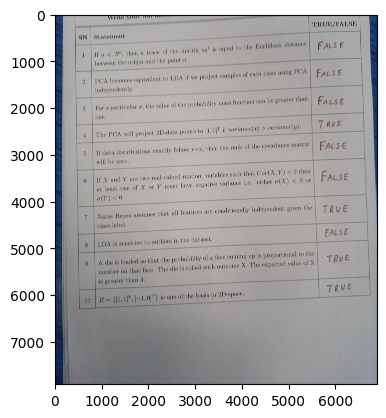

In [ ]:
plt.imshow(cv2.imread(arr[16]))

In [ ]:
def preprocess_image(img):

    # Apply thresholding to binarize the image
    if len(img.shape) == 3:  # Check if the image has 3 channels (color image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to enhance the text
    kernel = np.ones((3, 3), np.uint8)
    morphed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    return morphed_img

In [ ]:
import easyocr
from pylab import rcParams
from IPython.display import Image

In [ ]:
reader = easyocr.Reader(['en'],gpu = True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
def get_bound(image):
    # image=preprocess_image(image)
    # plt.imshow(image)
    # plt.show()
    res = reader.readtext(image)
    # print(res)
    height,width=image.shape[:2]
    bound=int(width*0.75)
    cur=1
    texts=[]
    cropped_images = []
    for (bbox, text, prob) in res:
        # cur+=1
        # print(text)
    # unpack the bounding box
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        #   print(tl,bound)
        if(cur==1 and len(text)>4 and ('/' in text) ):
            bound=tl[0]-50
            cur=0
            break
    return bound

def crop_image(image_path):
    image=cv2.imread(image_path)
    height,width=image.shape[:2]
    # image=cv2.resize(image,(width//2,height//2))
    # plt.imshow(image)

    bound=get_bound(image[:height//15,:])
    # print(bound)
    cropped_image=image[:,bound:]
    return cropped_image


In [ ]:
def blur_text_regions(image_path):
    # Read the image
    # image = cv2.imread(image_path)
    cropped=crop_image(image_path)
    image=cropped.copy()
    # Perform OCR to detect text regions
    results = reader.readtext(image)

    # Loop through the detected text regions
    for (bbox, text, prob) in results:
        # Extract the bounding box coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Extract the region of interest (ROI)
        roi = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
        roi_height = bottom_right[1] - top_left[1]
        roi_width = bottom_right[0] - top_left[0]
        kernel_size = (max(1, roi_width // 3) | 1, max(1, roi_height // 3) | 1)
        # Apply Gaussian blur to the ROI
        blurred_roi = cv2.GaussianBlur(roi, kernel_size, 0)

        # Replace the original ROI with the blurred ROI
        image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = blurred_roi

    # Save the output image
    # cv2.imwrite(output_path, image)
    # plt.imshow(image)
    # plt.show()
    return image,cropped

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Detected Lines: [array([[1075,  361, 1173,  357]], dtype=int32), array([[1000, 1000, 1100,  998]], dtype=int32), array([[1019, 1614, 1114, 1613]], dtype=int32), array([[ 765, 2213,  882, 2211]], dtype=int32), array([[ 992, 2617, 1087, 2617]], dtype=int32), array([[ 621, 3202,  755, 3202]], dtype=int32), array([[ 776, 3973,  871, 3972]], dtype=int32), array([[ 835, 4555,  925, 4554]], dtype=int32), array([[ 966, 4942, 1060, 4941]], dtype=int32), array([[ 698, 5718,  800, 5716]], dtype=int32), array([[ 909, 6107, 1002, 6103]], dtype=int32)]


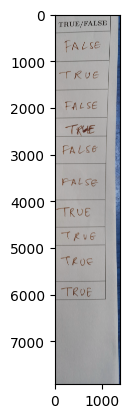

In [ ]:
def detect_lines(image_path):
    """
    Detect lines in an image using Hough Line Transform.

    Args:
    - image_path: Path to the input image.

    Returns:
    - image_with_lines: The image annotated with detected lines.
    - lines: The list of detected lines.
    """
    # # Load the image
    # image = cv2.imread(image_path)
    image,org_image = blur_text_regions(image_path);
    # print(image)
    # Check if the image is loaded properly
    if image is None:
        raise ValueError(f"Image not found or could not be loaded from {image_path}")

    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:  # Check if the image has 3 channels (color image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Image is already grayscale

    # gray=preprocess_image(gray)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=90, minLineLength=90, maxLineGap=10)

    # Copy the original image to draw lines on it
    # image_with_lines = image.copy()

    # Draw the lines on the image
    horizontal_lines = []
    if lines is not None:
        for line in lines:

            x1, y1, x2, y2 = line[0]
            if x1>image.shape[1]/3:
                    angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
                    # Consider lines with an angle close to 0 or 180 degrees as horizontal
                    if abs(angle) < 60 or abs(angle - 180) < 60:


                            horizontal_lines.append(line)

    horizontal_lines.sort(key=lambda line: line[0][1])

    # Filter out lines that are too close to each other
    filtered_horizontal_lines = []
    for i in range(len(horizontal_lines)):
        if i == 0:
            filtered_horizontal_lines.append(horizontal_lines[i])
        else:
            _, y1_prev, _, y2_prev = horizontal_lines[i - 1][0]
            _, y1_curr, _, y2_curr = horizontal_lines[i][0]
            if abs(y1_curr - y1_prev) >=200 and abs(y2_curr - y2_prev) >= 200:
                filtered_horizontal_lines.append(horizontal_lines[i])
    filtered_horizontal_lines=[i for i in filtered_horizontal_lines if (i[0][1]>100 and i[0][1]<7000)]
    if(len(filtered_horizontal_lines)>0):
        temp=[]
        for i in range(0,len(filtered_horizontal_lines)-1):
            temp.append(filtered_horizontal_lines[i])
            if(filtered_horizontal_lines[i+1][0][1]-filtered_horizontal_lines[i][0][1]>1000):
                diff=filtered_horizontal_lines[i+1][0][1]-filtered_horizontal_lines[i][0][1]
                diff=diff//2
                temp.append([[filtered_horizontal_lines[i][0][0],filtered_horizontal_lines[i][0][1]+diff,filtered_horizontal_lines[i][0][2],filtered_horizontal_lines[i][0][3]+diff]])
        temp.append(filtered_horizontal_lines[-1])
    else:
        temp=filtered_horizontal_lines
    # filtered_horizontal_lines=[i for i in filtered_horizontal_lines if i[0][1]>100]
    # Draw the filtered horizontal lines on the image
    # for line in filtered_horizontal_lines:
    #     x1, y1, x2, y2 = line[0]
    #     # print(x1,y1,x2,y2)
    #     cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 3)
    # plt.figure(figsize=(10,10))
    # plt.imshow(image_with_lines)
    # plt.show()

    return org_image, temp



image_with_lines, lines = detect_lines(arr[42])

# Display the image with lines


plt.imshow( image_with_lines)


print(f"Detected Lines: {lines}")

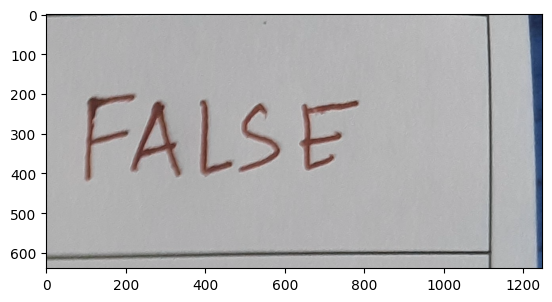

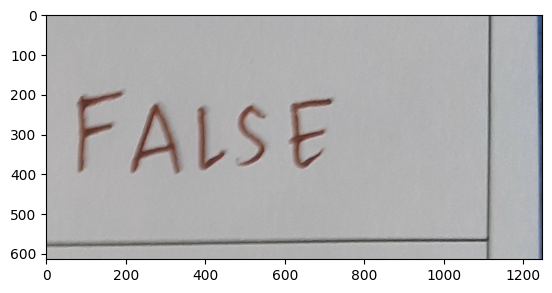

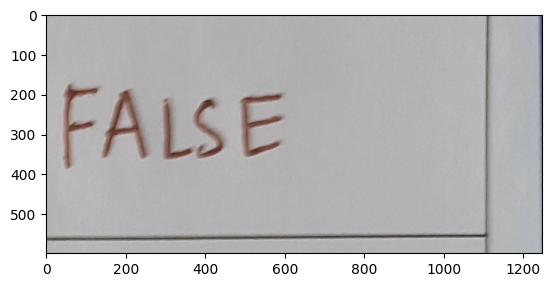

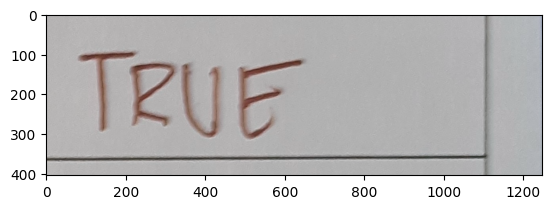

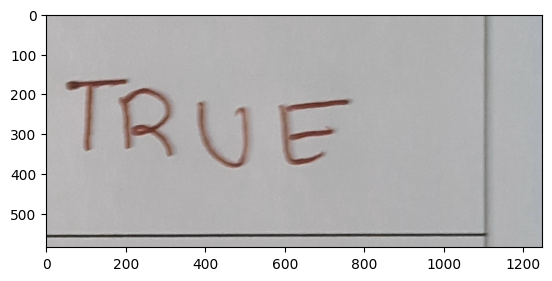

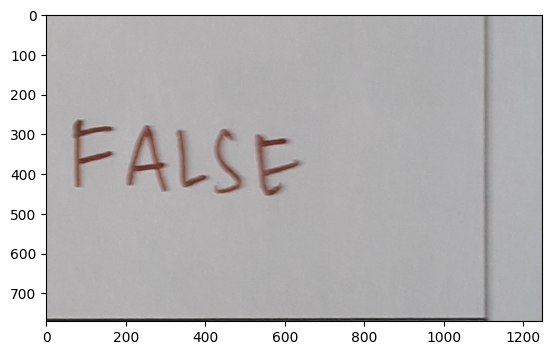

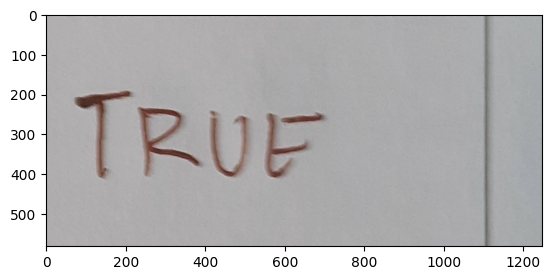

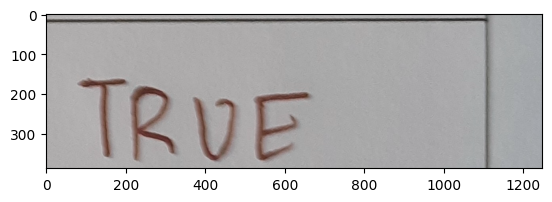

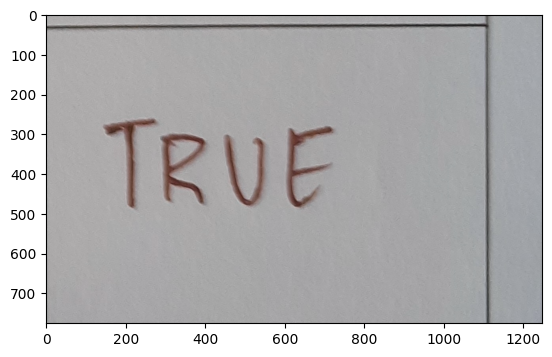

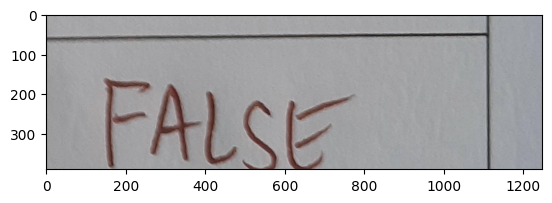

Detected Lines: [array([[1075,  361, 1173,  357]], dtype=int32), array([[1000, 1000, 1100,  998]], dtype=int32), array([[1019, 1614, 1114, 1613]], dtype=int32), array([[ 765, 2213,  882, 2211]], dtype=int32), array([[ 992, 2617, 1087, 2617]], dtype=int32), array([[ 621, 3202,  755, 3202]], dtype=int32), array([[ 776, 3973,  871, 3972]], dtype=int32), array([[ 835, 4555,  925, 4554]], dtype=int32), array([[ 966, 4942, 1060, 4941]], dtype=int32), array([[ 698, 5718,  800, 5716]], dtype=int32), array([[ 909, 6107, 1002, 6103]], dtype=int32)]


In [ ]:
def divide_image_into_parts(image, lines):
    """
    Divide the image into 10 parts using the provided lines.

    Args:
    - image: The input image.
    - lines: The list of line coordinates.

    Returns:
    - divided_images: List of 10 image parts.
    """
    lines.sort(key=lambda line: line[0][1])  # Ensure lines are sorted by their y-coordinates

    divided_images = []
    height, width = image.shape[:2]

    # Add the top and bottom boundaries of the image to the lines
    all_y_coords =  [line[0][1] for line in lines]

    # Extract 10 parts of the image based on the y-coordinates
    for i in range(len(all_y_coords) - 1):
        y1 = all_y_coords[i]
        y2 = all_y_coords[i + 1]
        part = image[y1:y2, :]
        divided_images.append(part)

    return divided_images



# # Detect lines and get the annotated image with lines
# image_with_lines, lines = detect_lines()

# Divide the image into 10 parts
divided_images = divide_image_into_parts(crop_image(arr[23]), lines)

# Display the divided parts
for i, part in enumerate(divided_images):
    plt.figure()
    plt.imshow(part,cmap='gray')
    # plt.title(f"Part {i+1}")
    plt.show()

print(f"Detected Lines: {lines}")

In [ ]:

def get_cropped_images(image_path):
    org_image,lines=detect_lines(image_path)
    org_image=preprocess_image(org_image.copy())
    divided_images=divide_image_into_parts(org_image,lines)
    texts=[]
    for img in divided_images:
        results = reader.readtext(img)
        i=0;
        for bbox,text,score in results:
            if(len(text)==0):
              continue
            if(i!=0):
                break
            texts.append(txt(text))
            i+=1
        if(i==0):
            texts.append("nan")
    texts=np.array(texts)
    # for i, part in enumerate(divided_images):
    #     plt.figure()
    #     plt.imshow(part,cmap='gray')
    #     plt.title(f"{texts[i]}")
    #     plt.show()
    return divided_images,texts




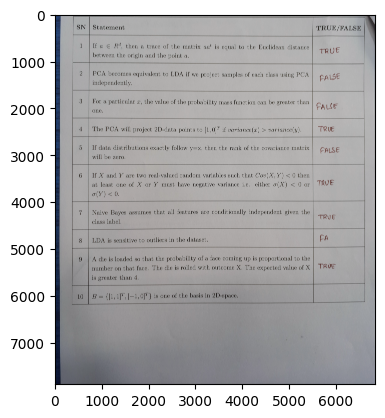

In [ ]:
plt.imshow(cv2.imread(arr[35]))

In [ ]:
a,b=get_cropped_images(arr[41])

ta
eerr
folse
fals &
false
3
inue
toue
is
tque


In [ ]:
from tqdm import tqdm
answers=[]
i=0
for i in tqdm(range(len(temp))):
    # i+=1
    # print(i+1)
    images,texts=get_cropped_images(temp[i])
    answers.append(texts)

  1%|          | 3/576 [00:13<43:04,  4.51s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 576/576 [41:02<00:00,  4.27s/it]


In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
def correct(df):
    if(df.shape[1]==10):
        return df
    for i in range(len(df)):
        if(df.iloc[i][10]==None and df.iloc[i][10]!="nan" and df.iloc[i][0]=="nan"):
            li=list(df.iloc(i))
            li.pop(0)
            li.append("nan")
            df.iloc[i]=li
    return df.drop(list(range(10,df.shape[1])),axis=1)
def wrong_cols(df):
    return df[df.isnull().any(axis=1)].index
def cal_marks(a1,a2):
    ans=0
    for i in range(len(a1)):
        if(a1[i].lower()==str(a2[i]).lower()):
            ans+=1
    return ans
def get_real_marks(marks,names):
    real_marks=[marks[marks['Filename']==i]['Total Marks'].values[0] for i in names]
    return real_marks
def process_df(df,answer,marks_df,file_names):
    correct_ans=answer['Correct Answer']
    names=[i.split('/')[-1] for i in file_names]
    df=correct(df)
    w_cols=wrong_cols(df)
    df.replace(np.nan,"nan",inplace=True)
    real_marks=get_real_marks(marks_df,names)
    # mean_marks=int(np.array(real_marks).mean())
    # return 1
    print(w_cols)
    pred_marks=[]
    for i in range(len(df)):
        cur=cal_marks(df.iloc[i],correct_ans)
        if(i in w_cols and cur<2):
            pred_marks.append(5)
        else:
            pred_marks.append(cur)

    print(f"accuracy : {accuracy_score(real_marks,pred_marks)}")
    print(f"mae : {mean_absolute_error(real_marks,pred_marks)}")


In [ ]:
import pandas as pd
df=pd.DataFrame(answers)
df.to_csv("dataframe.csv")
df

,0,1,2,3,4,5,6,7,8,9
0,true,true,true,true,false,true,true,false,true,None
1,true,true,true,true,true,false,true,true,false,true
2,true,true,false,true,true,true,true,true,false,true
3,true,true,false,true,false,false,true,false,true,true
4,true,true,false,false,true,false,true,false,true,true
...,...,...,...,...,...,...,...,...,...,...
571,false,true,false,false,true,false,false,true,true,true
572,true,false,false,true,true,false,true,false,false,true
573,true,true,false,false,false,false,true,true,false,true
574,true,false,true,true,true,false,true,true,true,false


In [ ]:
df[df.isnull().any(axis=1)].index

Index([  0,   5,  18,  22,  25,  31,  33,  36,  48,  53,  66,  70,  73,  79,
        81,  84,  96, 101, 114, 118, 121, 127, 129, 132, 144, 149, 162, 166,
       169, 175, 177, 180, 192, 197, 210, 214, 217, 223, 225, 228, 240, 245,
       258, 262, 265, 271, 273, 276, 288, 293, 306, 310, 313, 319, 321, 324,
       336, 341, 354, 358, 361, 367, 369, 372, 384, 389, 402, 406, 409, 415,
       417, 420, 432, 437, 450, 454, 457, 463, 465, 468, 480, 485, 498, 502,
       505, 511, 513, 516, 528, 533, 546, 550, 553, 559, 561, 564],
      dtype='int64')

In [ ]:
marks=pd.read_excel("/content/Marks.xlsx")
answer=pd.read_csv("/content/ModelAnswer (1).csv")

file_names=file_names*12

answer
# marks

,Question Number,Correct Answer
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,6,False
6,7,True
7,8,True
8,9,True
9,10,True


In [ ]:
process_df(df.copy(),answer,marks,file_names)

Index([  0,   5,  18,  22,  25,  31,  33,  36,  48,  53,  66,  70,  73,  79,
        81,  84,  96, 101, 114, 118, 121, 127, 129, 132, 144, 149, 162, 166,
       169, 175, 177, 180, 192, 197, 210, 214, 217, 223, 225, 228, 240, 245,
       258, 262, 265, 271, 273, 276, 288, 293, 306, 310, 313, 319, 321, 324,
       336, 341, 354, 358, 361, 367, 369, 372, 384, 389, 402, 406, 409, 415,
       417, 420, 432, 437, 450, 454, 457, 463, 465, 468, 480, 485, 498, 502,
       505, 511, 513, 516, 528, 533, 546, 550, 553, 559, 561, 564],
      dtype='int64')


ValueError: Found input variables with inconsistent numbers of samples: [11943936, 576]

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
print(f"accuracy : {accuracy_score(real_marks,pred_marks)}")
print(f"mae : {mean_absolute_error(real_marks,pred_marks)}")

NameError: name 'real_marks' is not defined

In [ ]:
answer

,Question Number,Correct Answer
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,6,False
6,7,True
7,8,True
8,9,True
9,10,True
